## Transaction Table

To make it realistic

# Income
Higher income -> Higher amount of transactions and amount in each transaction

# Age
Younger customers: smaller transactions
Middle Age Customers: moderate transactions
Older Customers: smaller transactions

# Marital Status
Married customers are more likely to transact more than single customers

# CLV
High CLV customers have larger and more frequent transaction 


In [ ]:
import random
import pandas as pd
from faker import Faker
from scipy.stats import norm
from datetime import datetime

fake = Faker()

#Extract customer dataset
df_customers = pd.read_csv("../data/processed/customer.csv")
customers = df_customers.to_dict(orient="records")

NUM_TRANSACTIONS = 2500
TRANSACTION_TYPES = ["Deposit", "Withdrawal", "Transfer", "Credit"]
transactions = []

for _ in range(NUM_TRANSACTIONS):
    customer = random.choice(customers) 
    income = customer["income"]
    age = customer["age"]
    marital = customer["marital"]
    clv = customer["customer_lifetime_value"]
    
    # Adjust transaction frequency
    num_transaction = 1

    # Adjust frequency based on incomme
    if 6000 <= income <= 10000:
        num_transaction += 1
    elif income > 10000:
        num_transaction += 2

    # Adjust frequency based on marital
    if marital == 'married':
        num_transaction += 2

    # Adjust frequency based on CLV
    if 300 <= clv <= 500:
        num_transaction += 1
    elif clv > 500:
        num_transaction += 2

    TOTAL_NUM_TRANSACTION = random.randint(1, num_transaction)

    for _ in range(TOTAL_NUM_TRANSACTION):
        # Base transaction amount based on income (5% of income)
        mean_transaction = income * 0.05  
        std_transaction = mean_transaction * 0.5 

        # Adjust based on age
        if age < 30:
            mean_transaction *= 0.8
        elif 30 <= age <= 50:
            mean_transaction *= 1.0
        else:
            mean_transaction *= 0.9
        
        # Adjust based on marital status
        if marital == "married":
            mean_transaction *= 1.2
        elif marital == "single":
            mean_transaction *= 0.8

        # Adjust based on CLV
        if clv > 10:
            mean_transaction *= 1.5
        else:
            mean_transaction *= 0.8
        
        # Adding randomness
        std_transaction = mean_transaction * 0.5
        transaction_amt = max(2, round(norm.rvs(mean_transaction, std_transaction), 2))
        
        transactions.append({
            "transaction_id": fake.unique.random_int(min=100000, max=999999),
            "customer_id": customer["customer_id"],
            "transaction_type": random.choice(TRANSACTION_TYPES),
            "transaction_amt": transaction_amt,
            "transaction_date": fake.date_time_between(
                start_date=datetime(2023, 1, 1), 
                end_date=datetime(2024, 12, 31)
            ),
        })

df_transactions = pd.DataFrame(transactions)

# Save datasets (optional)
# df_customers.to_csv("customers.csv", index=False)
df_transactions.to_csv("../data/processed/transactions.csv", index=False)

# Display sample data
# print("Customer Data Sample:")
# print(df_customers.head())
print("\nTransaction Data Sample:")
print(df_transactions.head())



Transaction Data Sample:
   transaction_id  customer_id transaction_type  transaction_amt  \
0          565883         3634          Deposit            87.81   
1          789839          198         Transfer             2.00   
2          692432         2196         Transfer           205.70   
3          902052         2196           Credit           166.89   
4          715628         2196         Transfer           157.69   

     transaction_date  
0 2023-07-05 21:10:21  
1 2024-11-14 17:50:59  
2 2024-03-20 17:47:23  
3 2024-06-30 22:02:15  
4 2024-07-18 02:42:53  


# Transaction table data analysis

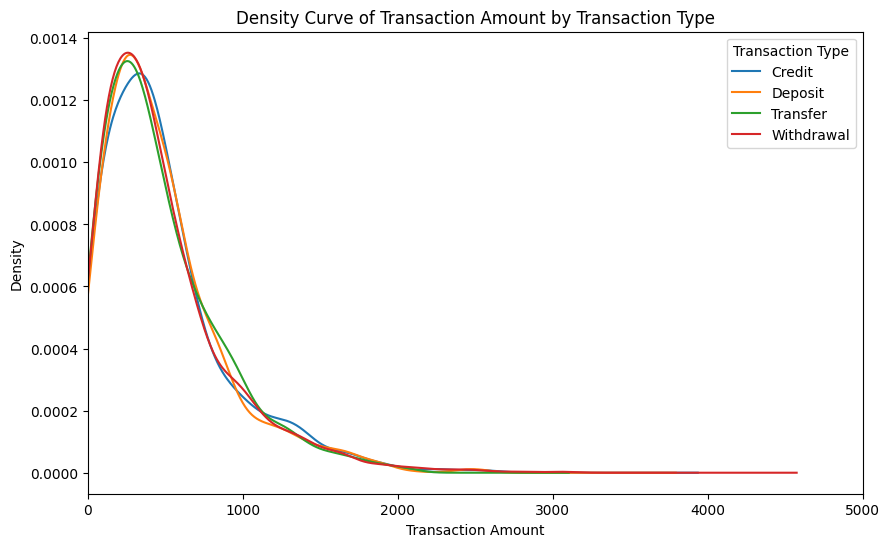

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/processed/customer.csv")


# Plot density curves for transaction_amt grouped by transaction_type
plt.figure(figsize=(10, 6))  # Set figure size

# Group by transaction_type and plot KDE for each group
for ttype, group in df_transactions.groupby("transaction_type"):
    group["transaction_amt"].plot.kde(label=ttype)

# Add labels, title, and legend
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.title("Density Curve of Transaction Amount by Transaction Type")
plt.legend(title="Transaction Type")
plt.xlim(0,5000)
# Show the plot
plt.show()


In [20]:
import random
import pandas as pd
from faker import Faker

fake = Faker()

# Step 1: Define lists for campaign attributes
CAMPAIGN_TYPES = ["Email Marketing", "Affliate Marketing", "Display Advertising", "Search Engine Optimization", "Telemarketing"]
TARGET_AUDIENCES = ["Men 18-24", "Men 25-34", "Men 35-44", "Men 45-54", "Men 55+", "Women 18-24", "Women 25-34", "Women 35-44", "Women 45-54", "Women 55+" "All Ages"]

LANGUAGES = ["English", "Spanish", "French", "German", "Mandarin"]

# Step 2: Generate Campaigns
NUM_CAMPAIGNS = 100  # Number of campaigns to generate

campaigns = []
for campaign_id in range(1, NUM_CAMPAIGNS + 1):
    campaign_type = random.choice(CAMPAIGN_TYPES)
    target_audience = random.choice(TARGET_AUDIENCES)
    campaign_duration = random.randint(7, 60) 
    conversion_rate = round(random.uniform(0.01, 0.15), 4)  # Between 0.5% and 5%
    impressions = random.randint(1000, 50000)  # Number of people who viewed the ad
    click = round(impressions * conversion_rate)  # Number of clicks (based on conversion rate)
    
    # Calculate acquisition cost and ROI
    # Acquisition cost could be proportionally based on the number of clicks and some base cost per click
    base_cost_per_click = random.uniform(1, 10)  # A random cost per click between $1 and $10
    acquisition_cost = round(base_cost_per_click * click, 2)
    
    # ROI is a derived metric: the higher the conversion rate and impressions, the better
    roi = round(random.uniform(1.5, 5.0), 2)  # A simple ROI between 1.5 and 5.0

    # Campaign language is selected randomly
    campaign_language = random.choice(LANGUAGES)

    campaigns.append({
        "campaign_id": campaign_id,
        "campaign_type": campaign_type,
        "target_audience": target_audience,
        "campaign_duration": campaign_duration,
        "conversion_rate": conversion_rate,
        "acquisition_cost": acquisition_cost,
        "roi": roi,
        "campaign_language": campaign_language,
        "impressions": impressions,
        "click": click
    })

df_campaigns = pd.DataFrame(campaigns)

# Save to CSV (optional)
# df_campaigns.to_csv("campaigns.csv", index=False)

# Display a sample of the generated data
print(df_campaigns.head())


   campaign_id               campaign_type target_audience  campaign_duration  \
0            1  Search Engine Optimization     Women 25-34                 39   
1            2          Affliate Marketing       Men 35-44                 47   
2            3         Display Advertising     Women 45-54                 17   
3            4          Affliate Marketing     Women 45-54                 20   
4            5               Telemarketing         Men 55+                 31   

   conversion_rate  acquisition_cost   roi campaign_language  impressions  \
0           0.1412          41388.86  4.74          Mandarin        34056   
1           0.0168            807.88  3.67          Mandarin        45876   
2           0.0990           8940.94  4.71            French        39995   
3           0.0421           6365.87  1.97          Mandarin        26736   
4           0.0690            726.90  4.12           Spanish         4255   

   click  
0   4809  
1    771  
2   3960  
3   11